In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [44]:
test_data = pd.read_parquet("C:\\Users\\n1117\\CODES_NOTE\\ML_NOTE\\vk_inter\\test.parquet")
test_data

,id,dates,values
0,6125,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[1.85, -0.04, 0.19, -0.45, -0.75, -0.95, -2.91..."
1,26781,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[-0.41, 0.39, -0.47, -0.9, -1.46, -0.51, 0.51,..."
2,13333,"[2016-06-01, 2016-07-01, 2016-08-01, 2016-09-0...","[-0.29, -1.26, 0.17, -1.22, 0.45, -0.94, 0.16,..."
3,53218,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[-1.47, 1.55, -0.03, 0.57, -0.57, 0.6, 0.27, 1..."
4,84204,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[2.33, 1.39, -1.03, -2.64, 1.89, 1.77, 1.43, 1..."
...,...,...,...
19995,80341,"[2016-03-01, 2016-04-01, 2016-05-01, 2016-06-0...","[3.01, -0.58, 1.55, 0.48, -0.35, 1.93, 3.86, 2..."
19996,5891,"[2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...","[0.66, 1.3, 2.78, -0.25, -1.97, -0.55, -1.08, ..."
19997,29091,"[2017-01-01, 2017-02-01, 2017-03-01, 2017-04-0...","[0.09, 0.44, 1.55, 0.15, 0.3, 0.19, 0.34, 1.05..."
19998,85877,"[2017-04-01, 2017-05-01, 2017-06-01, 2017-07-0...","[0.28, 1.92, 1.14, 2.4, 1.46, 1.08, -0.12, 0.6..."


In [26]:
test_data["dates"] = test_data["dates"].apply(pd.to_datetime)
test_data["dates"][0]

DatetimeIndex(['2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
      

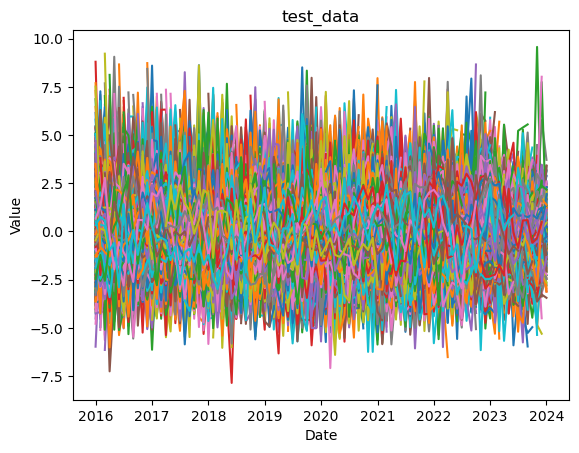

In [ ]:
for _, row in test_data.iterrows():
    plt.plot(row["dates"], row["values"])
plt.title("test_data")
plt.xlabel("Date")
plt.ylabel("Value")
plt.show()

In [51]:
values = pd.Series(test_data['values'].sum())

# Проверка наличия пропущенных значений
if pd.isnull(values).any():
    # Обработка пропущенных значений
    values = values.interpolate()

# Проверка наличия выбросов
# ...

# Проверка наличия тренда
plt.plot(values)
plt.title('Time Series Plot')
plt.show()

# Проверка наличия сезонности
result = seasonal_decompose(values, model='additive', period=1)
result.plot()
plt.show()

# Проверка стационарности
result = adfuller(values)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# Определение порядка AR и MA
acf_values = acf(values)
pacf_values = pacf(values)
plt.plot(acf_values)
plt.title('ACF Plot')
plt.show()
plt.plot(pacf_values)
plt.title('PACF Plot')
plt.show()


TypeError: operands could not be broadcast together with shapes (57,) (55,) 